**Steps**
Importing all dependencies
Loading datasets
Intial exploration
Data Cleaning
Data Analysis

**Task 1.Importing All Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


**Task 2.Loading Datasets**

In [2]:
data=pd.read_csv(r"C:\Users\Dhamodharan\Downloads\datasets.csv",encoding_errors='ignore')

**Task 3.Intial Exploration**

In [9]:
data.shape

(20770, 22)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [11]:
# Statistical summary
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


**Task 4:Data Cleaning**

In [13]:
data.isnull().sum()

# Droping All Missing values
data.dropna(inplace=True)

#data.fillna()

In [14]:
data.isnull().sum()
# After Droping the null values shape of the Data
data.shape


(20736, 22)

In [15]:
# Dealing with Duplicates Rows

data.duplicated().sum()

# Deleting  all Duplicated Values
# data[data.duplicated()]

data.drop_duplicates(inplace=True)
data.duplicated().sum()


np.int64(0)

In [16]:
# Type Casting
# Changing Data types

data.dtypes

data['id']=data['id'].astype(object)
data.dtypes

data['host_id']=data['host_id'].astype(object)
data.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

**Task 5:Data Analysis**

Univariate Analysis

<Axes: xlabel='price'>

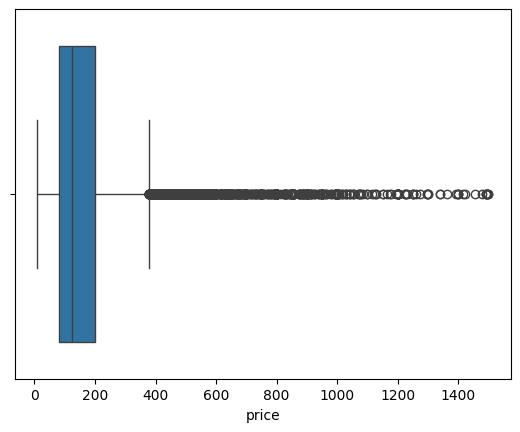

In [17]:
# Identifying outliers in price

df=data[data['price'] < 1500]

sns.boxplot(data=df,x='price')

Text(0.5, 1.0, 'price Distribution')

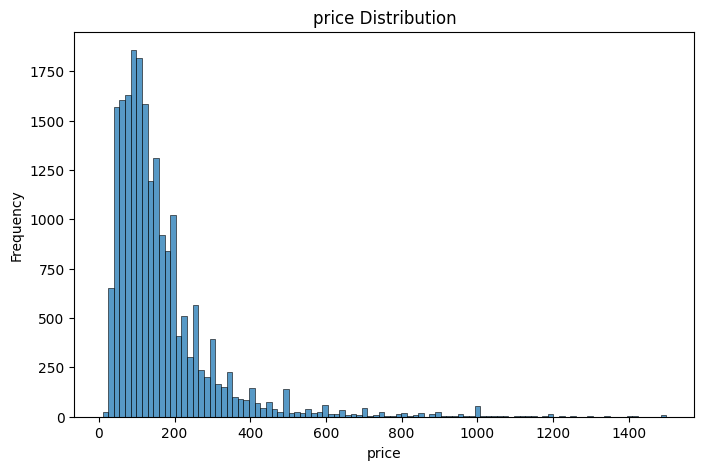

In [18]:
# Univariate Anlaysis
# Price distribution


plt.figure(figsize=(8,5))
plt.ylabel("Frequency")
sns.histplot(data=df,x='price',bins=100)
plt.title("price Distribution")

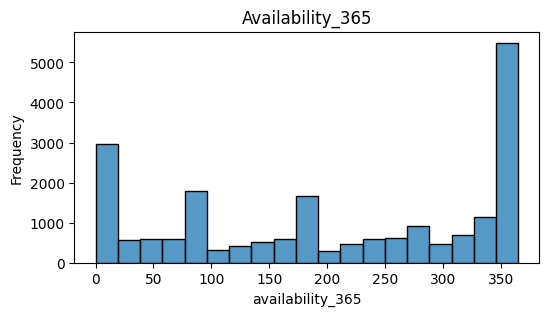

In [20]:
# Price Distribution

plt.figure(figsize=(6,3))
sns.histplot(data=df,x='availability_365')
plt.title("Availability_365")
plt.ylabel("Frequency")
plt.show()



In [23]:
# Average Price Per bed
df.groupby(by='neighbourhood_group')['price per bed'].mean()


KeyError: 'Column not found: price per bed'

In [24]:
df.groupby(by='neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx            107.990506
Brooklyn         155.138317
Manhattan        204.146014
Queens           121.681939
Staten Island    118.780069
Name: price, dtype: float64

** Feature Engineering**

In [25]:

# price per bed
df['price per bed']=df['price']/df['beds']
df.head()

C:\Users\Dhamodharan\AppData\Local\Temp\ipykernel_26964\288534179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price per bed']=df['price']/df['beds']


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price per bed
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,55.0
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139.0,364.0,2.0,No License,4.67,2,1,1,144.0
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1,93.5
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2.0,363.0,12.0,No License,4.64,1,1,1,120.0
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1,85.0


**Bi Variable Analysis**
one varaiable depending another variable

<Axes: xlabel='neighbourhood_group', ylabel='price'>

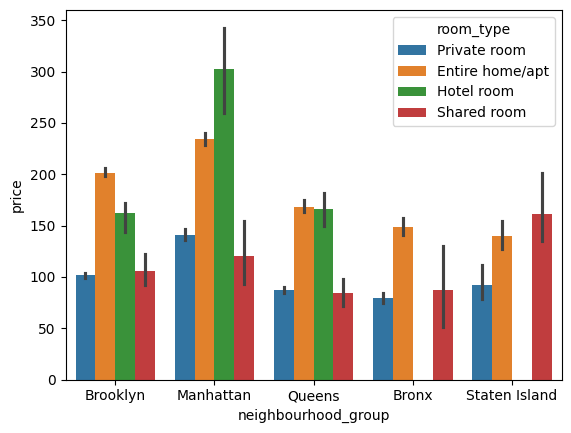

In [26]:
# Price dependency on neighbourhood
sns.barplot(data=df,x='neighbourhood_group',y='price',hue='room_type')

<Axes: title={'center': 'Locality and Review Dependency'}, xlabel='number_of_reviews', ylabel='price'>

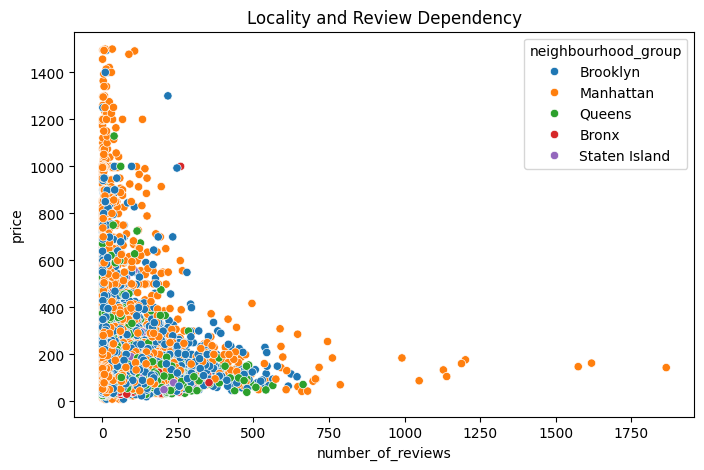

In [27]:
# Number of reviews and Price
plt.figure(figsize=(8,5))
plt.title("Locality and Review Dependency")
sns.scatterplot(data=df,x='number_of_reviews',y='price',hue='neighbourhood_group')

In [28]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
price per bed                     float64
dtype: object

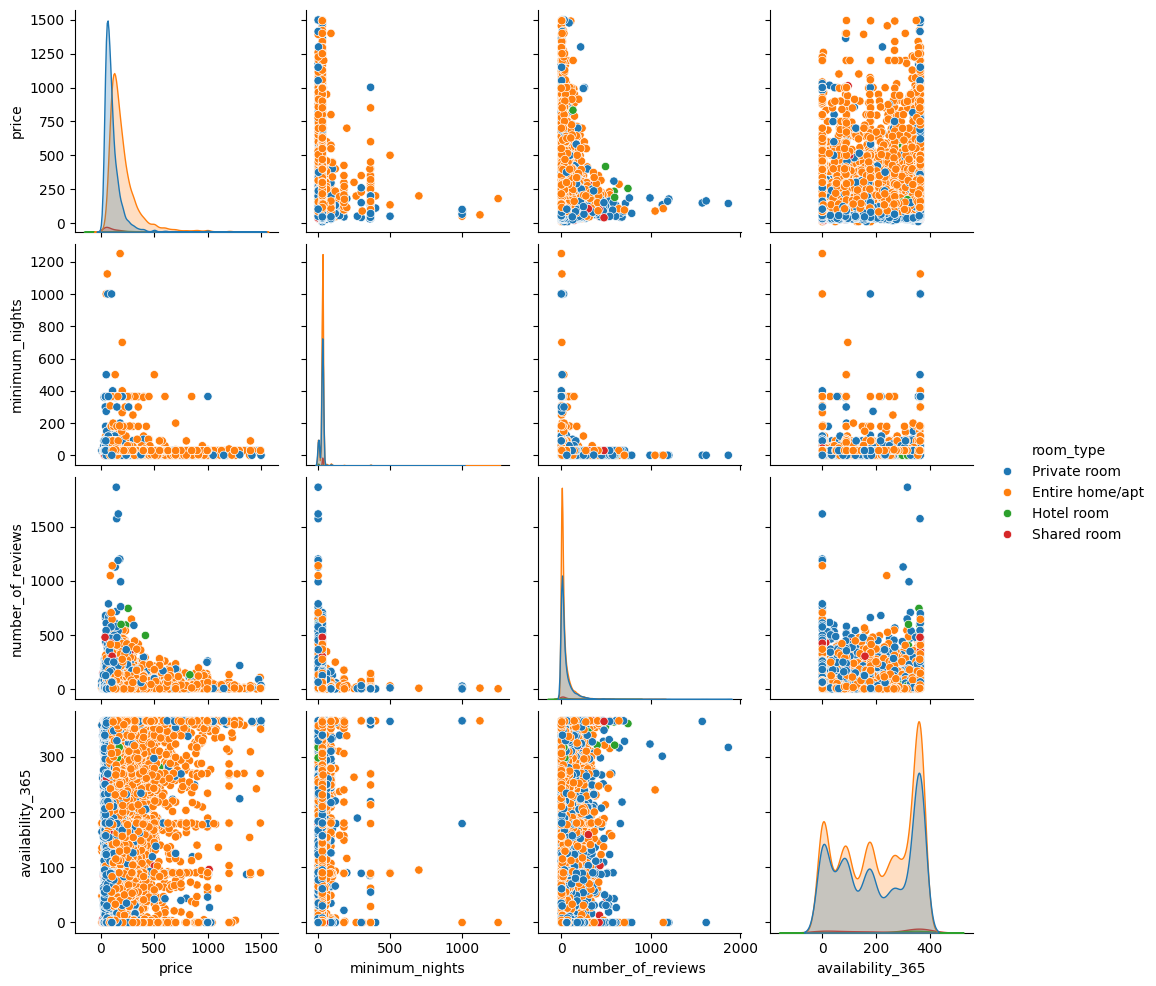

In [29]:
sns.pairplot(data=df,vars=['price', 'minimum_nights' ,'number_of_reviews','availability_365'],hue='room_type')

<Figure size 1000x800 with 0 Axes>

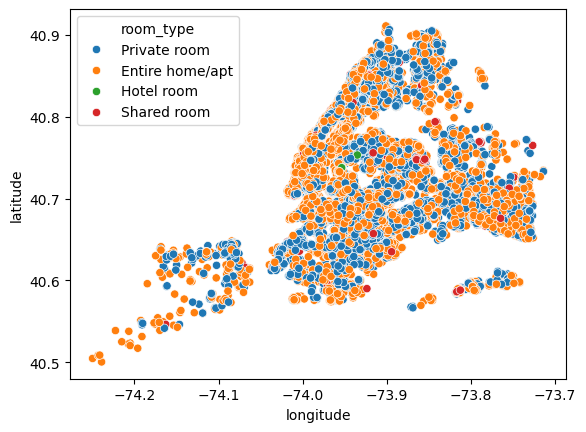

<Figure size 1000x800 with 0 Axes>

In [30]:
# Geographical Distribution of AirBnB Listing

sns.scatterplot(data=df,x='longitude',y='latitude',hue='room_type')
plt.figure(figsize=(10,8))


In [34]:
data.to_csv('airbnbupdated.csv')